<a href="https://colab.research.google.com/github/t2wain/colab/blob/master/Learn_Iris_Data_Set.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [0]:
print(tf.__version__)

# Inspect data

In [0]:
iris = datasets.load_iris()

In [0]:
idata = iris.data
print('iris type', type(iris))
print('idata type', type(idata))

iris type <class 'sklearn.utils.Bunch'>
idata type <class 'numpy.ndarray'>


In [0]:
np.set_printoptions(threshold=10)
print(idata)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 ...
 [6.5 3.  5.2 2. ]
 [6.2 3.4 5.4 2.3]
 [5.9 3.  5.1 1.8]]


In [0]:
print('ndim:', idata.ndim)
print('shape:', idata.shape)
print('size:', idata.size)
print('dtype:', idata.dtype)

ndim: 2
shape: (150, 4)
size: 600
dtype: float64


In [0]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [0]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [0]:
np.set_printoptions(threshold=1000)
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

# Assemble data into DataFrame

In [0]:
col_names = ['sepal_length',
             'sepal_width',
             'petal_length',
             'petal_width']
piris = pd.DataFrame(iris.data, columns=col_names)

In [0]:
species = iris.target_names[iris.target]
piris['species'] = pd.Categorical(species)
piris.species.value_counts()

virginica     50
versicolor    50
setosa        50
Name: species, dtype: int64

# Exploratory data analysis (EDA)

In [0]:
piris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null category
dtypes: category(1), float64(4)
memory usage: 5.0 KB


In [0]:
piris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [0]:
piris.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [0]:
piris.describe(include=['category'])

,species
count,150
unique,3
top,virginica
freq,50


In [0]:
piris.describe(include=[np.number])

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [0]:
gspecies = piris.groupby('species')
gspecies.size()

species
setosa        50
versicolor    50
virginica     50
dtype: int64

In [0]:
gspecies.describe().T

species                setosa  versicolor  virginica
sepal_length count  50.000000   50.000000  50.000000
             mean    5.006000    5.936000   6.588000
             std     0.352490    0.516171   0.635880
             min     4.300000    4.900000   4.900000
             25%     4.800000    5.600000   6.225000
             50%     5.000000    5.900000   6.500000
             75%     5.200000    6.300000   6.900000
             max     5.800000    7.000000   7.900000
sepal_width  count  50.000000   50.000000  50.000000
             mean    3.428000    2.770000   2.974000
             std     0.379064    0.313798   0.322497
             min     2.300000    2.000000   2.200000
             25%     3.200000    2.525000   2.800000
             50%     3.400000    2.800000   3.000000
             75%     3.675000    3.000000   3.175000
             max     4.400000    3.400000   3.800000
petal_length count  50.000000   50.000000  50.000000
             mean    1.462000    4.260000   5.552000
             std     0.173664    0.469911   0.551895
             min     1.000000    3.000000   4.500000
             25%     1.400000    4.000000   5.100000
             50%     1.500000    4.350000   5.550000
             75%     1.575000    4.600000   5.875000
             max     1.900000    5.100000   6.900000
petal_width  count  50.000000   50.000000  50.000000
             mean    0.246000    1.326000   2.026000
             std     0.105386    0.197753   0.274650
             min     0.100000    1.000000   1.400000
             25%     0.200000    1.200000   1.800000
             50%     0.200000    1.300000   2.000000
             75%     0.300000    1.500000   2.300000
             max     0.600000    1.800000   2.500000

In [0]:
piris.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [0]:
piris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

# Plotting

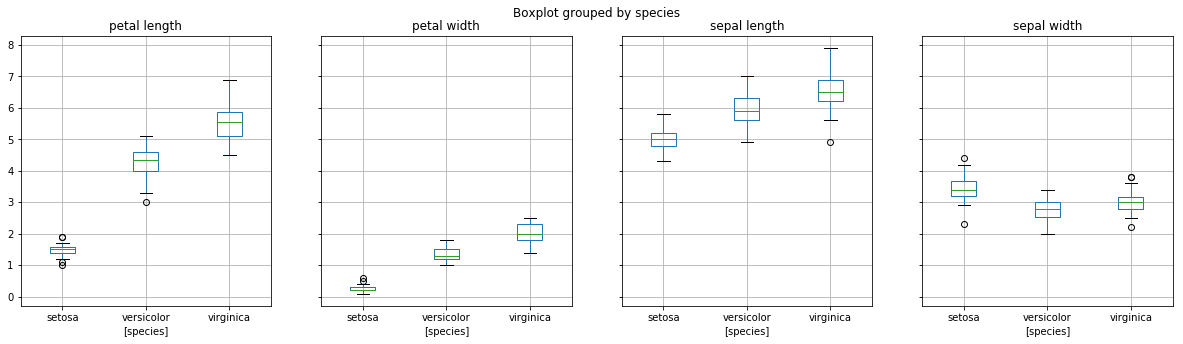

In [0]:
piris.boxplot(by='species', layout=(1,4), figsize=(20,5))
plt.show()

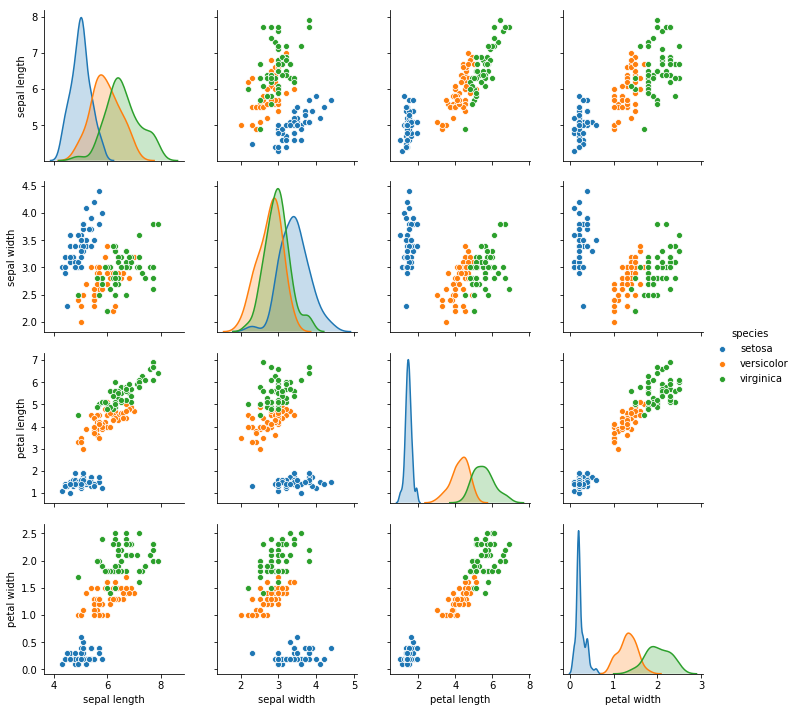

In [0]:
sns.pairplot(piris, hue="species")
plt.show()

# Play with DataFrame

In [0]:
pd.concat([piris[:10],piris[50:60], piris[100:110]])

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [0]:
pd.merge(piris.iloc[0:10,0:2], piris.iloc[0:10,2:4], left_index=True, right_index=True)

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


# Example 1

In [0]:
def ex1():
  iris = datasets.load_iris()
  
  x_train, x_test, y_train, y_test = train_test_split(
      iris.data, iris.target, test_size=0.3, random_state=42)
  
  
  def build():
    sepal_length_feat = tf.feature_column.numeric_column('sepal_length')
    sepal_width_feat = tf.feature_column.numeric_column('sepal_width')
    petal_length_feat = tf.feature_column.numeric_column('petal_length')
    petal_width_feat = tf.feature_column.numeric_column('petal_width')

    feat_cols =[sepal_length_feat, sepal_width_feat, petal_length_feat, petal_width_feat]

    return tf.estimator.LinearClassifier(feature_columns=feat_cols,n_classes=3)
  
  
  model = build()
  
  
  def _get_input_func(x,y,epoch,shuffle):
    return tf.estimator.inputs.numpy_input_fn(x={
      'sepal_length':x[:,0],
      'sepal_width':x[:,1],
      'petal_length':x[:,2],
      'petal_width':x[:,3]
    }, y=y, batch_size=20, num_epochs=epoch, shuffle=shuffle)
    
  
  def train():
    input_func = _get_input_func(x_train,y_train,1000,True)
    model.train(input_fn=input_func)
    
    
  def evaluate():
    input_func_train = _get_input_func(x_train,y_train,1,False)
    train_metric = model.evaluate(input_fn=input_func_train)
    
    input_func_test = _get_input_func(x_test,y_test,1,False)
    test_metric = model.evaluate(input_fn=input_func_test)
    
    return (train_metric, test_metric)
  
  
  def predict():
    input_func = _get_input_func(x_test,y_test,1,False)
    return list(model.predict(input_func))
  
  
  def compare(pred):
    for i in range(40):
      p = iris.target_names[int(pred[i]['classes'][0])]
      y = iris.target_names[y_test[i]]
      print((p,y))
      
      
  return (train, evaluate, predict, compare)
    
  
(ex1_train, ex1_evaluate, ex1_predict, ex1_compare) = ex1()

In [0]:
ex1_train()

In [0]:
(ex1_train_metric, ex1_test_metric) = ex1_evaluate()
print('Train Metric')
print(ex1_train_metric)
print('Test Metric')
print(ex1_test_metric)

In [0]:
ex1_prediction = ex1_predict()

In [0]:
ex1_compare(ex1_prediction)

# Example 2

## Helper methods

In [0]:
def data_gen(X, Y=None, batch_size=1, epochs=1):
  X_size, _ = X.shape

  for step in range(epochs * X_size // batch_size):
    offset = (step * batch_size) % X_size
    batch_x = X[offset:(offset + batch_size), :]
    batch_y = None if Y is None else Y[offset:(offset + batch_size)]
    yield (batch_x, batch_y)

In [0]:
def build_regression_classifier(num_features, num_labels):
  
  Wvar = tf.Variable(tf.zeros([num_features, num_labels]))
  bvar = tf.Variable(tf.zeros([num_labels]))
  Xin = tf.placeholder("float", shape=[None, num_features])
  Yin = tf.placeholder("float", shape=[None, num_labels])

  def build_model(X, W, b):
    y_model = tf.nn.softmax(tf.matmul(X, W) + b)
    return y_model
  
  def loss(Y, output):
    xentropy = -tf.reduce_sum(Y * tf.log(output), reduction_indices=1)
    loss = tf.reduce_mean(xentropy)
    return loss

  output = build_model(Xin, Wvar, bvar)
  cost = loss(Yin, output)

  correct_prediction = tf.equal(tf.argmax(output, 1), tf.argmax(Yin, 1))
  accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

  return (Xin, Yin, Wvar, bvar, output, cost, correct_prediction, accuracy)

In [0]:
def build_classifier_estimator(num_features, num_labels):

  W_val = None
  b_val = None
  (X, Y, W, b, y_model, cost, correct_prediction, accuracy) = build_regression_classifier(num_features, num_labels)

  def train(xsample, ysample,  batch_size=1, training_epochs=1, learning_rate=0.01):
    nonlocal W_val, b_val
    
    #train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)
    train_op = tf.train.AdamOptimizer(learning_rate).minimize(cost)
    
    with tf.Session() as sess:
      sess.run(tf.global_variables_initializer())
      for (batch_xs, batch_labels) in data_gen(xsample, ysample,  batch_size, training_epochs):
        err, _ = sess.run([cost, train_op], feed_dict={X: batch_xs, Y: batch_labels})
      W_val = sess.run(W)
      b_val = sess.run(b)
      
  def _initModel(sess):
    sess.run(W.assign(W_val))
    sess.run(b.assign(b_val))
  
  def evaluate(xsample, ysample, batch_size=1):
    with tf.Session() as sess:
      _initModel(sess)
      cost_total = accurracy_total = step = 0
      for (batch_xs, batch_ys) in data_gen(xsample, ysample,  batch_size):
        cost_val, accuracy_val = sess.run([cost, accuracy], feed_dict={X: batch_xs, Y: batch_ys})
        cost_total += cost_val
        accurracy_total += accuracy_val
        step += 1
      return (cost_val, accurracy_total/step)
    
  def predict(xdata, labels, batch_size=1):
    with tf.Session() as sess:
      _initModel(sess)
      res = [];
      for (batch_xs, _) in data_gen(xdata, batch_size=batch_size):
        ydata = sess.run(tf.argmax(y_model, 1), feed_dict={X: batch_xs})
        res.extend(ydata)
      return labels[res]
  
  return (train, evaluate, predict)

## Example

In [0]:
def ex2():
  iris = datasets.load_iris()
  
  def _one_hot():
    species = iris.target_names[iris.target]
    py_dummies = pd.get_dummies(pd.Categorical(species))
    labels = py.columns.to_numpy()
    return (labels, py_dummies.to_numpy())

  def _one_hot2():
    y_target = np.expand_dims(iris.target, axis=1)
    enc = OneHotEncoder(categories=[[0,1,2]])
    enc.fit(y_target)
    return (iris.target_names, enc.transform(y_target).toarray())
 
  y_labels, y_dummies = _one_hot2()
  
  x_train, x_test, y_train, y_test = train_test_split(
    iris.data, y_dummies, test_size=0.3, random_state=42)

  train_size, num_features = x_train.shape
  num_labels = len(iris.target_names)
  
  (_train, _evaluate, _predict) = build_classifier_estimator(num_features, num_labels)


  def train():
    _train(x_train, y_train, 20, 1000)


  def eval():
    (cost_val, accuracy_val) = _evaluate(x_train, y_train, 20)
    print("Train metric:")
    print({"accuracy": accuracy_val, "loss": cost_val})
    
    (cost_val, accuracy_val) = _evaluate(x_test, y_test, 20)
    print("Test metric:")
    print({"accuracy": accuracy_val, "loss": cost_val})


  def predict():
    y_pred = _predict(x_test, iris.target_names, 20)
    ydata = y_labels[np.argmax(y_test, axis=1)]
    return np.array(list(zip(ydata, y_pred)))

  return (train, eval, predict)


(ex2_train, ex2_eval, ex2_predict) = ex2()

In [15]:
ex2_train()
ex2_eval()

Train metric:
{'accuracy': 0.9799999952316284, 'loss': 0.04841536}
Test metric:
{'accuracy': 1.0, 'loss': 0.03801109}


In [0]:
print(ex2_predict())